In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df=pd.read_csv(r"C:\Users\jazoi\Downloads\MLF_GP1_CreditScore.csv")
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


## EDA

In [29]:
print("Number of rows: ", len(df.index))
print("Number of columns: ",len(df.columns))

Number of rows:  1700
Number of columns:  28


In [30]:
df.dtypes

Sales/Revenues              float64
Gross Margin                float64
EBITDA                      float64
EBITDA Margin               float64
Net Income Before Extras    float64
Total Debt                  float64
Net Debt                    float64
LT Debt                     float64
ST Debt                     float64
Cash                        float64
Free Cash Flow              float64
Total Debt/EBITDA           float64
Net Debt/EBITDA             float64
Total MV                    float64
Total Debt/MV               float64
Net Debt/MV                 float64
CFO/Debt                    float64
CFO                         float64
Interest Coverage           float64
Total Liquidity             float64
Current Liquidity           float64
Current Liabilities         float64
EPS Before Extras           float64
PE                          float64
ROA                         float64
ROE                         float64
InvGrd                        int64
Rating                      

In [31]:
df.shape

(1700, 28)

In [32]:
print("Count for each rating: ")
df['Rating'].value_counts()

Count for each rating: 


Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64

In [33]:
print("Count for investment grade bonds: ")
df['InvGrd'].value_counts()

Count for investment grade bonds: 


1    1287
0     413
Name: InvGrd, dtype: int64

In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1,-0.0263181,0.500178,-0.124079,0.0120237,0.0689376,0.175741,0.0489603,0.0149874,-0.00808846,0.0357156,0.0560921,0.110201,0.123111,0.0621285,0.176797,0.0168331,0.0340692,0.0327159,0.0357467,-0.0813455,0.553807,0.0347217,-0.0148425,0.00725076,-0.000205951,-0.0808364
Gross Margin,-0.0263181,1,0.114092,0.147886,-0.00106061,-0.00266534,0.00426626,-0.00314908,-0.00541671,-0.02454,0.00191952,-0.00568954,-0.000235625,0.0243607,-0.0039544,0.00994542,-0.055521,-0.0555688,-0.00207905,-0.0111902,-0.022793,0.051386,0.000857416,0.0291457,-0.00158315,0.000181603,-0.0661031
EBITDA,0.500178,0.114092,1,0.757142,0.0125648,0.00894894,0.119251,-0.000664732,0.00484382,-0.0307727,0.00910238,-0.00952694,0.0742839,0.256941,0.00285708,0.123084,-0.0545408,-0.0410638,0.0281176,-0.00879925,-0.0546803,0.207526,0.0421914,0.0407324,0.00791289,-0.00570075,-0.0859511
EBITDA Margin,-0.124079,0.147886,0.757142,1,0.00333131,-0.0398044,0.000336317,-0.0370086,-0.00631025,-0.0239973,-0.0213009,-0.0510616,-0.000145049,0.209314,-0.0417279,0.0042255,-0.0765536,-0.0753261,0.00814657,-0.0338622,-3.56939e-05,-0.119068,0.0215895,0.071426,0.00207211,-0.00832798,-0.0241115
Net Income Before Extras,0.0120237,-0.00106061,0.0125648,0.00333131,1,-0.001065,0.000867388,-0.0011615,-0.000220516,-0.00670318,0.023523,-0.00149003,0.000312123,-0.00551077,-0.00125212,0.000701082,0.00208419,0.00183201,0.00223266,-0.00193813,-0.00813127,0.00422557,0.506547,-0.00316632,0.997349,0.782491,-0.027919
Total Debt,0.0689376,-0.00266534,0.00894894,-0.0398044,-0.001065,1,-0.0222095,0.833567,0.11824,-0.0300017,0.00253875,0.999328,-0.0351365,-0.0564495,0.964306,-0.0223048,-0.00850824,0.000924394,-0.0160784,-0.000800865,-0.0315997,0.0623643,-0.00142444,-0.00365176,-0.00140611,0.000300858,-0.0903721
Net Debt,0.175741,0.00426626,0.119251,0.000336317,0.000867388,-0.0222095,1,-0.0213066,0.00119147,0.00718359,-0.013257,-0.031475,0.907461,0.000172782,-0.0192872,0.978717,0.00157946,0.00276158,-0.00356573,0.000492158,-0.0038239,0.0591392,0.00104592,-0.00037112,-0.000708867,-0.00196479,-0.0421947
LT Debt,0.0489603,-0.00314908,-0.000664732,-0.0370086,-0.0011615,0.833567,-0.0213066,1,0.0923928,-0.0300836,0.00239889,0.833357,-0.0328281,-0.0428304,0.805303,-0.0196847,-0.00624093,0.00126996,-0.0148102,-0.000532191,-0.0265733,0.023553,-0.00129811,-0.00354473,-0.00130345,0.00071183,-0.061665
ST Debt,0.0149874,-0.00541671,0.00484382,-0.00631025,-0.000220516,0.11824,0.00119147,0.0923928,1,-0.0128025,0.00444778,0.120847,7.82072e-05,-0.00701865,0.0894128,-0.00431074,-0.00269457,0.00272878,-0.00723318,0.000502784,-0.0232349,0.105872,0.000274645,-0.00270421,-0.000339184,-0.00102238,-0.0030283
Cash,-0.00808846,-0.02454,-0.0307727,-0.0239973,-0.00670318,-0.0300017,0.00718359,-0.0300836,-0.0128025,1,0.00260281,-0.0292707,0.0163371,0.115015,-0.0285434,0.00723177,0.0208861,0.0197515,-0.0239205,0.0239926,0.973123,0.0047121,-0.0174695,0.0341556,-0.00660575,-0.000344018,-0.0888769


## PCA

In [35]:
X_rating,y_rating = df.iloc[:,0:26].values, df.iloc[:, 27].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_rating, y_rating,test_size=0.25, random_state=11)

In [37]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

[3.63072345e-01 3.57195345e-01 1.04989895e-01 5.73728563e-02
 4.68238254e-02 1.65429331e-02 1.01062839e-02 9.46127327e-03
 9.40722039e-03 8.52776268e-03 6.76441288e-03 3.15635565e-03
 2.99607130e-03 1.63063268e-03 1.28979527e-03 5.17021954e-04
 6.29147309e-05 2.78744671e-05 1.91340911e-05 1.19001844e-05
 8.92866733e-06 6.67696296e-06 4.01067585e-06 2.92883697e-06
 1.45845463e-06 1.42724897e-07]


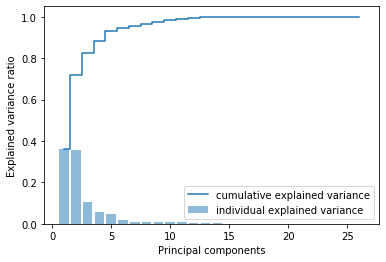

In [38]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
plt.bar(range(1,27), pca.explained_variance_ratio_, alpha=0.5, align='center',label='individual explained variance')
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1,27), cum_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [39]:
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print("Eigen Values: \n",eigen_vals)

Eigen Values: 
 [3.76580938e+00 2.97453777e+00 2.84077608e+00 2.18164412e+00
 2.01848740e+00 1.93023938e+00 1.52691312e+00 7.69086155e-01
 8.11285627e-01 1.04397867e+00 9.62315912e-01 9.64765725e-01
 9.93856224e-01 9.86545554e-01 9.82996638e-01 4.02275503e-01
 3.70369932e-01 2.37611841e-01 1.31299302e-01 5.36874900e-02
 3.53342606e-02 1.72732224e-02 1.05977610e-02 5.40928354e-03
 2.85875114e-04 3.02593782e-03]


<function matplotlib.pyplot.show(*args, **kw)>

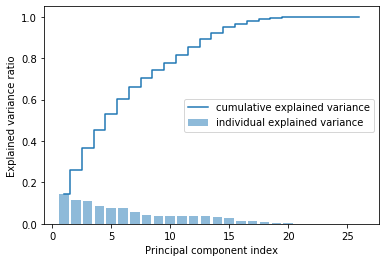

In [40]:
tot = sum(eigen_vals)
var_exp = [(i/tot)for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,27), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,27),cum_var_exp, where = 'mid',label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier()
clf = clf.fit(X_train_pca,y_train)
y_pred = clf.predict(X_test_std)

print("Decision Tree:")
print("----------------------")

R2_Train_Score_All_DTC = clf.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = clf.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Decision Tree:
----------------------
Train Score: 1.000
Test Score: 0.108


In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca,y_train)
y_pred = lr.predict(X_test_std)

print("Logistic Regression:")
print("----------------------")

R2_Train_Score_All_LR = lr.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_LR)

R2_Test_Score_All_LR = lr.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_LR)

C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression:
----------------------
Train Score: 0.259
Test Score: 0.125


In [43]:
from sklearn import svm

SVM = svm.SVC()
SVM = SVM.fit(X_train_pca,y_train)
y_pred = SVM.predict(X_test_std)

print("SVM:")
print("----------------------")

R2_Train_Score_All_SVM = SVM.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_SVM)

R2_Test_Score_All_SVM = SVM.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_SVM)

SVM:

C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



----------------------
Train Score: 0.472
Test Score: 0.193


In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC= RandomForestClassifier()
RFC = RFC.fit(X_train_pca,y_train)
y_pred = RFC.predict(X_test_std)

print("Random Forest:")
print("----------------------")

R2_Train_Score_All_RFC = RFC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_RFC)

R2_Test_Score_All_RFC = RFC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_RFC)

Random Forest:
----------------------
Train Score: 0.995
Test Score: 0.122


C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
#Source https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
  
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train_pca, y_train) 
grid_predictions = grid.predict(X_test_std)
print(classification_report(y_test, grid_predictions))

C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.191, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.193, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.198, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.193, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.193, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.200, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.191, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.193, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.195, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.191, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.357, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.360, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.374, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.379, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.351, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.336, total=   0.2s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.367, total=   0.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.9s finished
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


              precision    recall  f1-score   support

          A1       0.00      0.00      0.00        26
          A2       0.03      0.03      0.03        36
          A3       0.00      0.00      0.00         9
         Aa2       0.00      0.00      0.00        24
         Aa3       0.00      0.00      0.00        38
          B1       0.00      0.00      0.00        25
          B2       0.00      0.00      0.00        11
          B3       0.00      0.00      0.00         8
         Ba1       0.00      0.00      0.00         4
         Ba2       0.00      0.00      0.00        34
         Ba3       0.00      0.00      0.00        24
        Baa1       0.00      0.00      0.00        47
        Baa2       0.20      0.85      0.33        80
        Baa3       0.06      0.05      0.06        58
        Caa1       0.00      0.00      0.00         1

    accuracy                           0.17       425
   macro avg       0.02      0.06      0.03       425
weighted avg       0.05   

C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
import time
from sklearn.model_selection import cross_val_score

start = time.clock()

RFC = RandomForestClassifier(n_estimators = 1)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()

print('Random Forest with n_estimators = 1')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')

CV_accuracyScore_DF.head(10)

Random Forest with n_estimators = 1
-------------------------------------
Amount of time to run:  0.1264155999997456 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.p

,CV Fold,In-sample Score
0,0,0.294118
1,1,0.291045
2,2,0.282443
3,3,0.292308
4,4,0.283465
5,5,0.314961
6,6,0.266129
7,7,0.252033
8,8,0.295082
9,9,0.347107


In [47]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 10)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 10')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 10
-------------------------------------
Amount of time to run:  0.723988300000201 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.441176
1,1,0.410448
2,2,0.503817
3,3,0.523077
4,4,0.425197
5,5,0.393701
6,6,0.475806
7,7,0.430894
8,8,0.532787
9,9,0.520661


In [48]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 50)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 50')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 50
-------------------------------------
Amount of time to run:  3.3419718999994075 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.485294
1,1,0.507463
2,2,0.480916
3,3,0.615385
4,4,0.606299
5,5,0.496063
6,6,0.580645
7,7,0.626016
8,8,0.532787
9,9,0.644628


In [49]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 100)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 100')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 100
-------------------------------------
Amount of time to run:  7.632550099999207 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.529412
1,1,0.589552
2,2,0.549618
3,3,0.592308
4,4,0.622047
5,5,0.535433
6,6,0.572581
7,7,0.609756
8,8,0.631148
9,9,0.644628


In [50]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 200)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 200')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 200
-------------------------------------
Amount of time to run:  13.73170089999985 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.544118
1,1,0.597015
2,2,0.519084
3,3,0.646154
4,4,0.637795
5,5,0.559055
6,6,0.580645
7,7,0.585366
8,8,0.565574
9,9,0.661157


In [51]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 1)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 1")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 1
----------------------
Train Score: 0.231
Test Score: 0.122


In [52]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 2)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 2")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 2
----------------------
Train Score: 0.254
Test Score: 0.125


In [53]:
DTC = DecisionTreeClassifier(max_depth = 3)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 3")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 3
----------------------
Train Score: 0.275
Test Score: 0.122


In [54]:
DTC = DecisionTreeClassifier(max_depth = 5)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 5")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 5
----------------------
Train Score: 0.362
Test Score: 0.118


In [55]:
DTC = DecisionTreeClassifier(max_depth = 8)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 8")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 8
----------------------
Train Score: 0.521
Test Score: 0.082


In [56]:
DTC = DecisionTreeClassifier(max_depth = 13)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 13")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 13
----------------------
Train Score: 0.853
Test Score: 0.125


In [57]:
DTC = DecisionTreeClassifier(max_depth = 21)
DTC = DTC.fit(X_train_pca,y_train)
y_pred = DTC.predict(X_test_std)

print("Random Forest: max_depth = 21")
print("----------------------")

R2_Train_Score_All_DTC = DTC.score(X_train_pca, y_train)
print("Train Score: %.3f" % R2_Train_Score_All_DTC)

R2_Test_Score_All_DTC = DTC.score(X_test_std, y_test)
print("Test Score: %.3f" % R2_Test_Score_All_DTC)

Random Forest: max_depth = 21
----------------------
Train Score: 0.981
Test Score: 0.120


In [66]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 1)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_test,
    })

end = time.clock()
print('Random Forest with n_estimators = 1')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

Random Forest with n_estimators = 1
-------------------------------------
Amount of time to run:  0.11002209999969637 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: 

,CV Fold,In-sample Score
0,0,0.265306
1,1,0.106383
2,2,0.234043
3,3,0.255319
4,4,0.302326
5,5,0.333333
6,6,0.325000
7,7,0.128205
8,8,0.277778
9,9,0.228571


In [65]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 10)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 10')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 10
-------------------------------------
Amount of time to run:  0.6686622000015632 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.433824
1,1,0.470149
2,2,0.419847
3,3,0.553846
4,4,0.519685
5,5,0.440945
6,6,0.483871
7,7,0.414634
8,8,0.475410
9,9,0.454545


In [64]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 50)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 50')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 50
-------------------------------------
Amount of time to run:  3.0344301000004634 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.514706
1,1,0.544776
2,2,0.541985
3,3,0.623077
4,4,0.629921
5,5,0.488189
6,6,0.580645
7,7,0.552846
8,8,0.565574
9,9,0.619835


In [63]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 100)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 100')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 100
-------------------------------------
Amount of time to run:  6.170559100000901 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.529412
1,1,0.574627
2,2,0.534351
3,3,0.661538
4,4,0.598425
5,5,0.480315
6,6,0.604839
7,7,0.642276
8,8,0.540984
9,9,0.611570


In [62]:
start = time.clock()

RFC = RandomForestClassifier(n_estimators = 200)

cv_scores_train = cross_val_score(RFC, X_train_pca, y_train, cv=10)
cv_scores_test = cross_val_score(RFC, X_test_std, y_test, cv=10)

CV_accuracyScore_DF = pd.DataFrame(
    {
        'CV Fold': range(10),
        'In-sample Score': cv_scores_train,
    })

end = time.clock()
print('Random Forest with n_estimators = 200')
print("-------------------------------------")
print('Amount of time to run: ', end - start, 'seconds')


CV_accuracyScore_DF.head(10)

C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jazoi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Random Forest with n_estimators = 200
-------------------------------------
Amount of time to run:  12.339869600000384 seconds


C:\Users\jazoi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


,CV Fold,In-sample Score
0,0,0.529412
1,1,0.589552
2,2,0.549618
3,3,0.623077
4,4,0.622047
5,5,0.559055
6,6,0.596774
7,7,0.601626
8,8,0.565574
9,9,0.619835
